In [61]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline
%matplotlib inline
rcParams['figure.figsize'] = 12, 6
from datetime import datetime
import re
import math
from sklearn.metrics import make_scorer
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [62]:
d = pd.read_csv('tmp/engineered_features_2.csv')

In [63]:
s = d[d.Store == 1]
#s.info()

In [64]:
s['D'] = pd.to_datetime(s.Date)
#s.info()

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
s.index = s.D

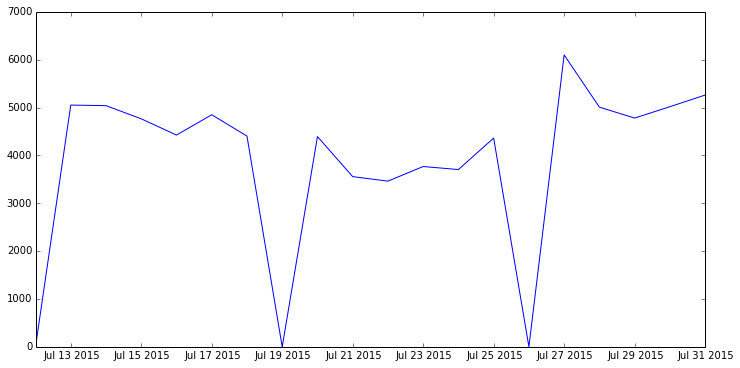

In [66]:
_ = plt.plot(s.D[:20], s.Sales[:20])

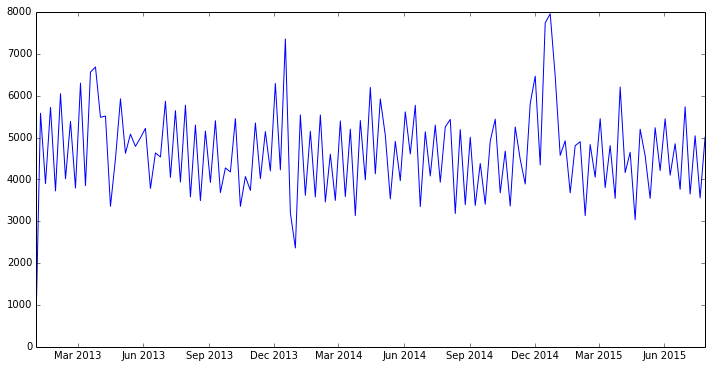

In [67]:
sd = s[s.DayOfWeek_2 == 1]
_ = plt.plot(sd[sd.DateYear >= 2013].D, sd[sd.DateYear >= 2013].Sales)

In [68]:
arma_mod = sm.tsa.ARMA(endog=sd.D, order=(25,0), freq='w').fit(solver='nm', tol=1, method='css')

ValueError: Cannot find a common data type.